In [229]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from random import shuffle
import cv2 as cv 



In [230]:
data_dir = "./data"
img_height = 24
img_width = 24
batch_size = 18

In [231]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 4846 files belonging to 2 classes.
Using 3877 files for training.


In [232]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 4846 files belonging to 2 classes.
Using 969 files for validation.


In [233]:
class_names = train_ds.class_names
print(class_names)


['closed', 'open']


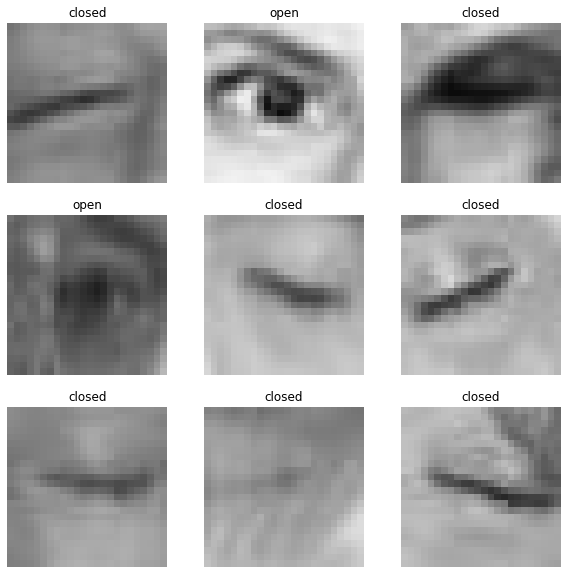

In [234]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [235]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(18, 24, 24, 3)
(18,)


In [236]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))



0.1137255 0.5019608


In [237]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [238]:
num_classes = 2
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(512, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(512, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(512, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [239]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [240]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)



Epoch 1/15


2022-03-26 18:09:05.160804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


216/216 [==============================] - ETA: 0s - loss: 0.4874 - accuracy: 0.7336

2022-03-26 18:09:14.598318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


216/216 [==============================] - 11s 46ms/step - loss: 0.4874 - accuracy: 0.7336 - val_loss: 0.3114 - val_accuracy: 0.8473
Epoch 2/15
216/216 [==============================] - 10s 45ms/step - loss: 0.2005 - accuracy: 0.9239 - val_loss: 0.1531 - val_accuracy: 0.9329
Epoch 3/15
216/216 [==============================] - 10s 45ms/step - loss: 0.1684 - accuracy: 0.9332 - val_loss: 0.1615 - val_accuracy: 0.9463
Epoch 4/15
216/216 [==============================] - 10s 45ms/step - loss: 0.1384 - accuracy: 0.9453 - val_loss: 0.1335 - val_accuracy: 0.9546
Epoch 5/15
216/216 [==============================] - 10s 45ms/step - loss: 0.1296 - accuracy: 0.9476 - val_loss: 0.1290 - val_accuracy: 0.9556
Epoch 6/15
216/216 [==============================] - 10s 45ms/step - loss: 0.1141 - accuracy: 0.9541 - val_loss: 0.1239 - val_accuracy: 0.9505
Epoch 7/15
216/216 [==============================] - 10s 45ms/step - loss: 0.1006 - accuracy: 0.9600 - val_loss: 0.1283 - val_accuracy: 0.9432
Epo

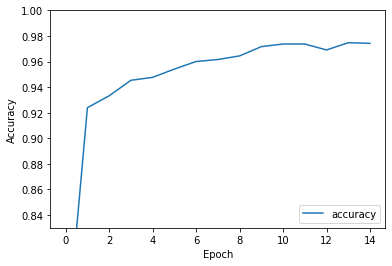

In [243]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.83,1])
plt.legend(loc='lower right')

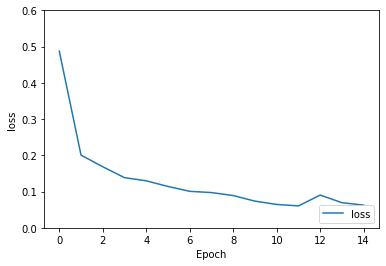

In [246]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0,0.6])
plt.legend(loc='lower right')

In [248]:
model.save('./model')

2022-03-26 18:13:59.677810: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./model/assets
